

Customer Purchase Propensity Prediction

Objective: Predict high-value customers using historical e-commerce behavior.
Tech Stack: Python, Pandas, Scikit-learn, SQL
Models: Logistic Regression, Random Forest

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("cleaned_olist_data.csv")

In [4]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_score,delivery_days,estimated_delivery_days,is_late_delivery,total_price,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,credit_card,1.0,18.12,4.0,8,15,False,38.71,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,3.0,voucher,1.0,2.00,4.0,8,15,False,38.71,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.0,voucher,1.0,18.59,4.0,8,15,False,38.71,2017-10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1.0,boleto,1.0,141.46,4.0,13,19,False,141.46,2018-07
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,credit_card,3.0,179.12,5.0,9,26,False,179.12,2018-08


In [5]:
df.shape

(115394, 29)

In [6]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score',
       'delivery_days', 'estimated_delivery_days', 'is_late_delivery',
       'total_price', 'order_month'],
      dtype='object')

In [7]:
customer_df = df.groupby("customer_id").agg({
    "payment_value": "sum",
    "order_id": "count",
    "review_score": "mean",
    "delivery_days": "mean",
    "is_late_delivery": "mean"
}).reset_index()

In [8]:
customer_df.columns = [
    "customer_id",
    "total_spend",
    "order_count",
    "avg_review_score",
    "avg_delivery_days",
    "late_delivery_ratio"
]

In [9]:
threshold = customer_df["total_spend"].median()

customer_df["high_value_customer"] = (
    customer_df["total_spend"] > threshold
).astype(int)

In [10]:
customer_df["high_value_customer"].value_counts()

,count
high_value_customer,
1,48094
0,48094


In [11]:
features = [
    "total_spend",
    "order_count",
    "avg_review_score",
    "avg_delivery_days",
    "late_delivery_ratio"
]

X = customer_df[features]
y = customer_df["high_value_customer"]

In [12]:
X = X.fillna(X.mean())

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)

In [15]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.9999480195446512
[[9502    1]
 [   0 9735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9503
           1       1.00      1.00      1.00      9735

    accuracy                           1.00     19238
   macro avg       1.00      1.00      1.00     19238
weighted avg       1.00      1.00      1.00     19238



In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

In [17]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Accuracy: 1.0
[[9503    0]
 [   0 9735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9503
           1       1.00      1.00      1.00      9735

    accuracy                           1.00     19238
   macro avg       1.00      1.00      1.00     19238
weighted avg       1.00      1.00      1.00     19238



In [18]:
importance = pd.Series(
    rf.feature_importances_, index=features
).sort_values(ascending=False)

importance

,0
total_spend,0.964321
order_count,0.031598
avg_delivery_days,0.003248
avg_review_score,0.000739
late_delivery_ratio,0.000094


This model predicts high-value customers based on historical purchasing behavior, delivery performance, and customer satisfaction. The insights can help businesses prioritize retention strategies and targeted marketing campaigns.


Limitations
	•	Simple threshold-based target
	•	No time-based modeling
	•	No hyperparameter tuning


In [20]:
customer_df.head()

,customer_id,total_spend,order_count,avg_review_score,avg_delivery_days,late_delivery_ratio,high_value_customer
0,00012a2ce6f8dcda20d059ce98491703,114.74,1,1.0,13.0,0.0,1
1,000161a058600d5901f007fab4c27140,67.41,1,4.0,9.0,0.0,0
2,0001fd6190edaaf884bcaf3d49edf079,195.42,1,5.0,5.0,0.0,1
3,0002414f95344307404f0ace7a26f1d5,179.35,1,5.0,28.0,0.0,1
4,000379cdec625522490c315e70c7a9fb,107.01,1,4.0,11.0,0.0,0


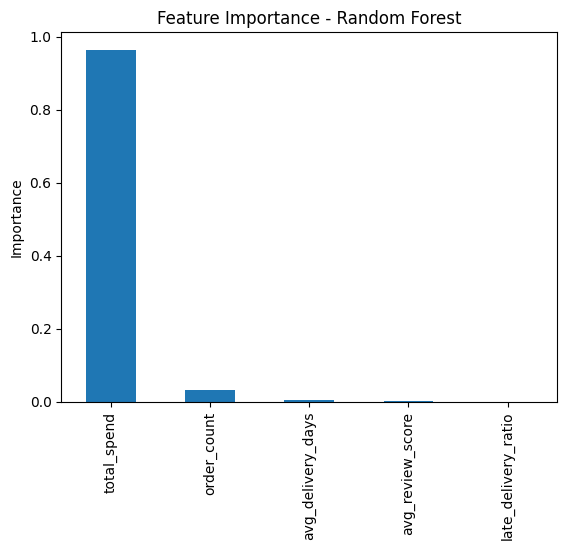

In [21]:
import matplotlib.pyplot as plt

importance.plot(kind="bar")
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance")
plt.show()

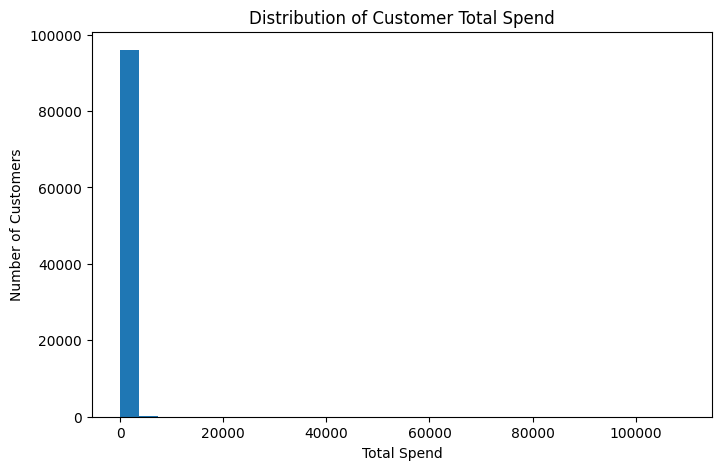

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(customer_df['total_spend'], bins=30)
plt.xlabel("Total Spend")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Total Spend")
plt.show()

 insight:
 Customer spend is right-skewed, with a small segment contributing significantly higher revenue, supporting the need for customer segmentation.

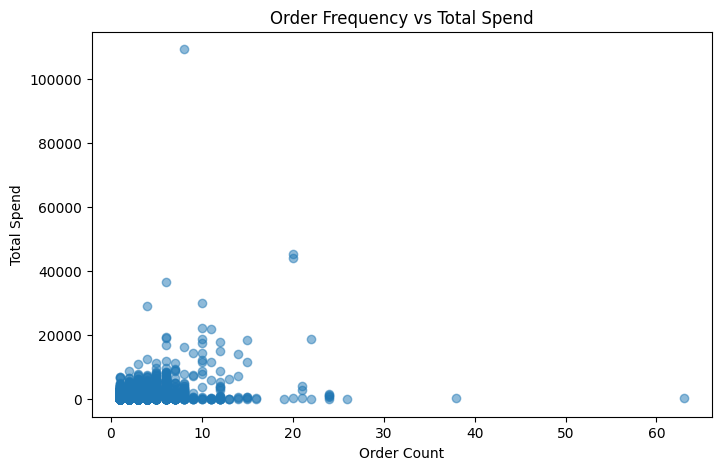

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(customer_df['order_count'], customer_df['total_spend'], alpha=0.5)
plt.xlabel("Order Count")
plt.ylabel("Total Spend")
plt.title("Order Frequency vs Total Spend")
plt.show()

Insight

Customers with higher order frequency tend to contribute more to total revenue, indicating repeat purchases as a key driver of customer value.




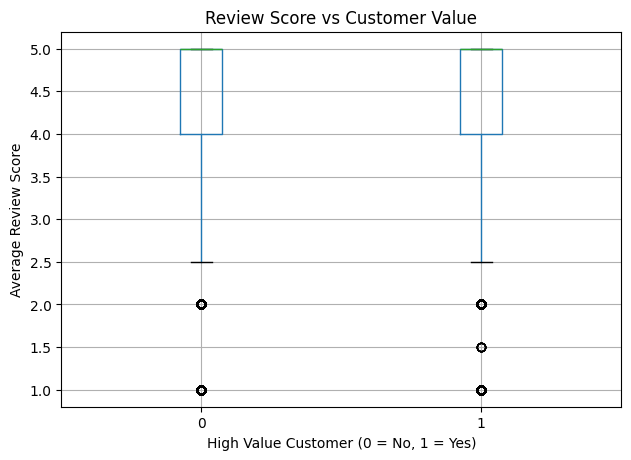

In [24]:
customer_df.boxplot(
    column='avg_review_score',
    by='high_value_customer',
    figsize=(7,5)
)
plt.xlabel("High Value Customer (0 = No, 1 = Yes)")
plt.ylabel("Average Review Score")
plt.title("Review Score vs Customer Value")
plt.suptitle("")
plt.show()

Insight

High-value customers tend to give slightly better review scores, suggesting satisfaction may influence repeat purchasing behavior.

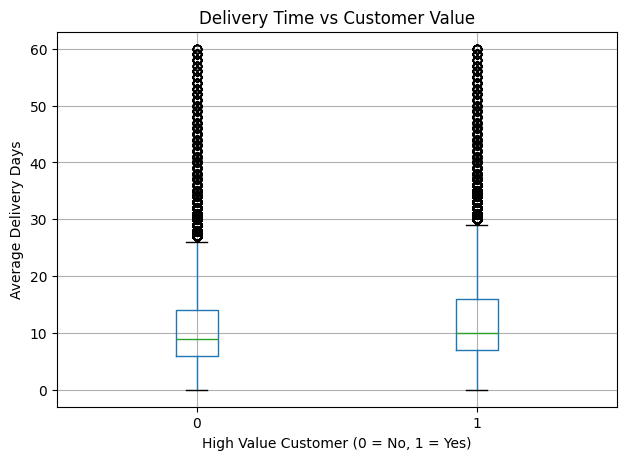

In [25]:
customer_df.boxplot(
    column='avg_delivery_days',
    by='high_value_customer',
    figsize=(7,5)
)
plt.xlabel("High Value Customer (0 = No, 1 = Yes)")
plt.ylabel("Average Delivery Days")
plt.title("Delivery Time vs Customer Value")
plt.suptitle("")
plt.show()

Insight

Customers experiencing faster deliveries are more likely to be high-value customers, highlighting delivery performance as a key retention factor.

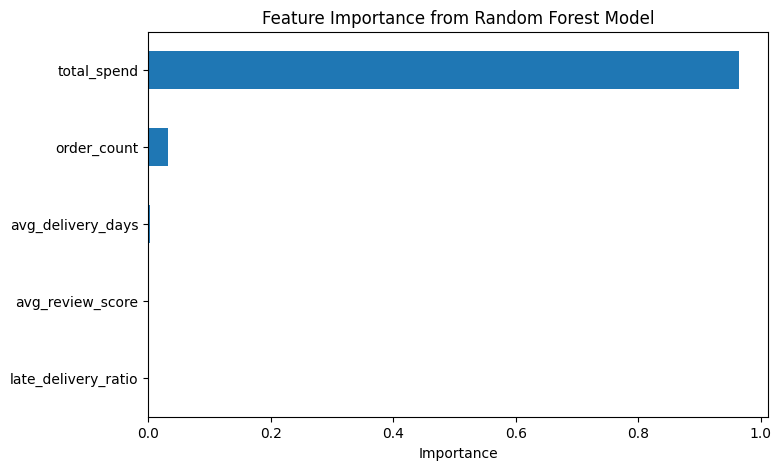

In [26]:
importance.sort_values().plot(kind='barh', figsize=(8,5))
plt.xlabel("Importance")
plt.title("Feature Importance from Random Forest Model")
plt.show()

Insight

Total spend and order frequency are the strongest predictors of customer value, followed by delivery reliability and review scores.
